In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load feature vectors extracted from CNN

In [2]:
X = np.load('features_inception_v3.npy')

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

data_dir = 'dataset/test/'

RESOLUTION = 150
BATCH_SIZE = 64

test_generator = test_datagen.flow_from_directory(
        data_dir,
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 192 images belonging to 3 classes.


In [5]:
y = []

for fname in test_generator.filenames:
    fname = fname.split('/')[0]
    if fname == 'cubism':
        y.append(0)
    if fname == 'expressionism':
        y.append(1)
    if fname == 'romanticism':
        y.append(2)

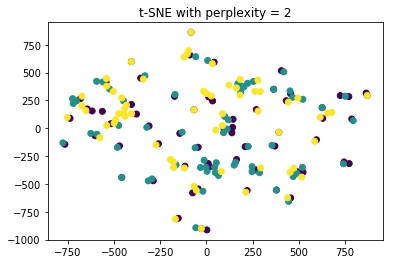

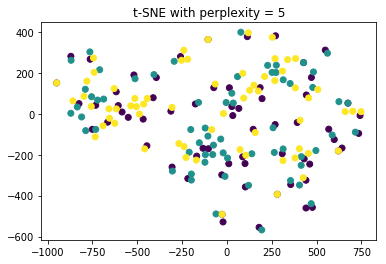

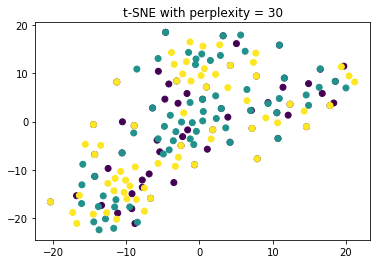

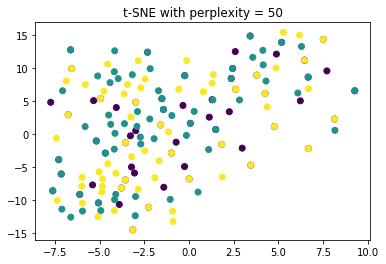

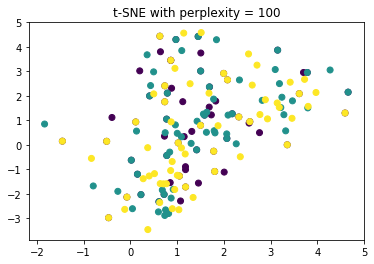

In [6]:
from sklearn.manifold import TSNE

for i in [2, 5, 30, 50, 100]:
    model = TSNE(n_components=2, n_iter=5000, init='pca', perplexity=i)
    Y = model.fit_transform(X)

    plt.scatter(Y[:, 0], Y[:, 1], c=y)
    plt.title('t-SNE with perplexity = {}'.format(i))
    plt.show()

In [61]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5).fit(Y)
distances, indices = neighbors.kneighbors(Y)

In [62]:
sample = 51

In [63]:
nns = [y[i] for i in indices[sample]]
nns

[0, 2, 1, 2, 0]

In [64]:
import matplotlib.image as mpimg
from os import listdir

def show_images(images, cols = 1, titles = None, filename='saida.png'):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    #plt.axis('off')
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.axis('off')
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
#     fig.savefig(filename, bbox_inches='tight')
    plt.show()

In [65]:
test_show = [test_generator.filenames[idx] for idx in indices[sample]]
test_show

['cubism/cubismo_308.jpg',
 'romanticism/realismo_316.jpg',
 'expressionism/expressionismo_289.jpg',
 'romanticism/realismo_258.jpg',
 'cubism/cubismo_307.jpg']

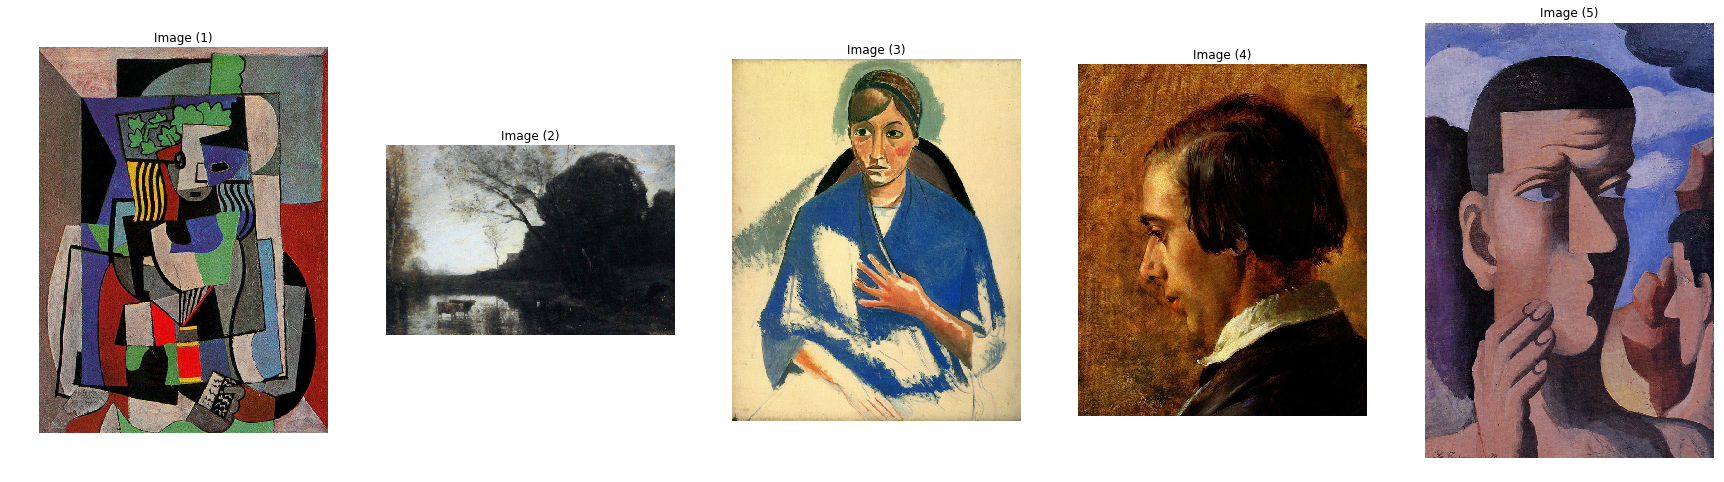

In [66]:
list_imgs = []

for f_name in test_show:
    list_imgs.append(mpimg.imread(data_dir + f_name))
    
show_images(list_imgs)

In [67]:
neighbors = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = neighbors.kneighbors(X)

In [68]:
nns = [y[i] for i in indices[sample]]
nns

[0, 2, 2, 2, 0]

In [69]:
test_show = [test_generator.filenames[idx] for idx in indices[sample]]
test_show

['cubism/cubismo_308.jpg',
 'romanticism/realismo_316.jpg',
 'romanticism/realismo_258.jpg',
 'romanticism/realismo_318.jpg',
 'cubism/cubismo_267.jpg']

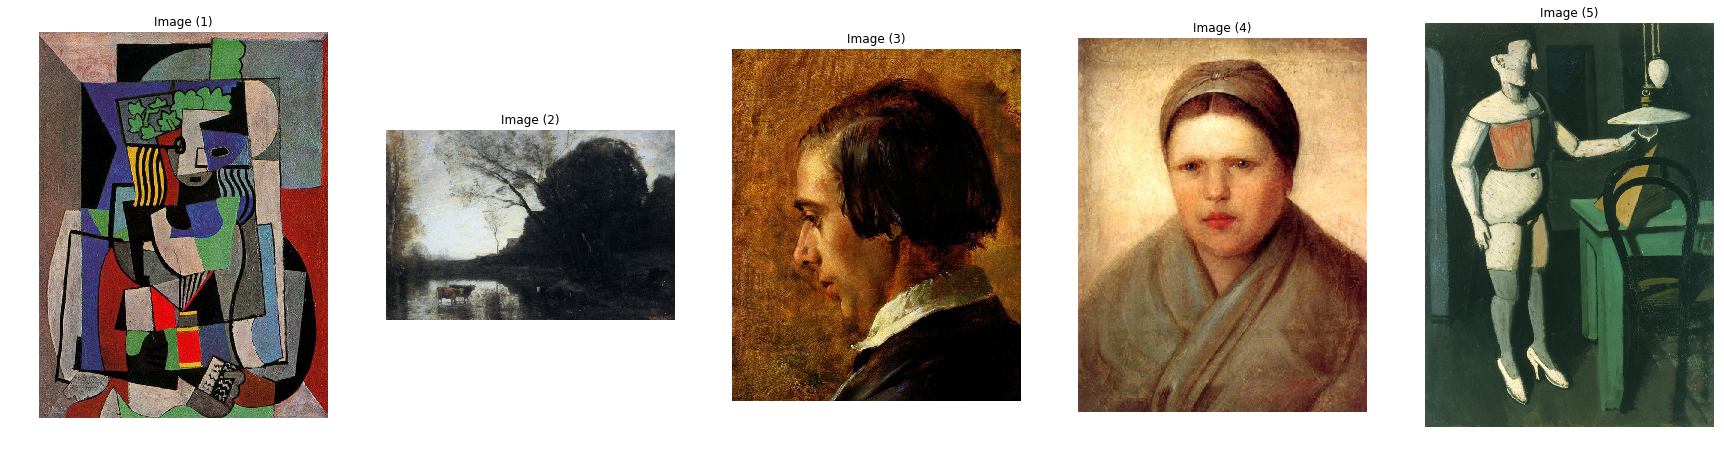

In [70]:
list_imgs = []

for f_name in test_show:
    list_imgs.append(mpimg.imread(data_dir + f_name))
    
show_images(list_imgs)